In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda i: ast.literal_eval(i) if pd.notna(i) else i)

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import seaborn as sns

df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df ['job_country']=='United States')].copy()

df_DA_US=df_DA_US.dropna(subset='salary_year_avg')

In [7]:
df_DA_US=df_DA_US.explode('job_skills')

df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay=df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills=df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


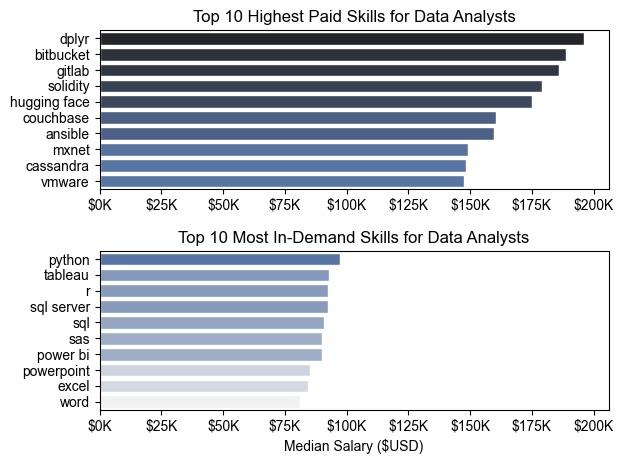

In [15]:
fig, ax=plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')

#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')

#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()

fig.tight_layout()

Text(0, 0.5, 'Number of Jobs')

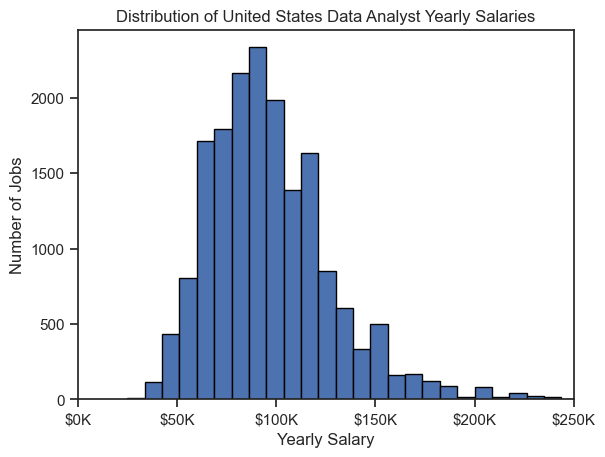

In [16]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0,250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

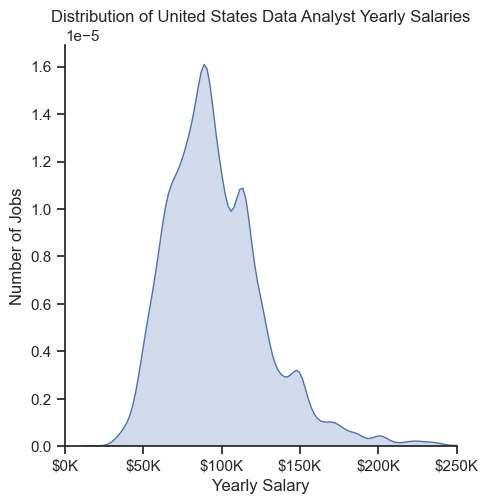

In [19]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.xlim(0,250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


In [21]:
job_titles=['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US=df[(df['job_title_short'].isin(job_titles)) & (df ['job_country']=='United States')].copy()

df_US=df_US.dropna(subset=['salary_year_avg'])

job_list=[ df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]


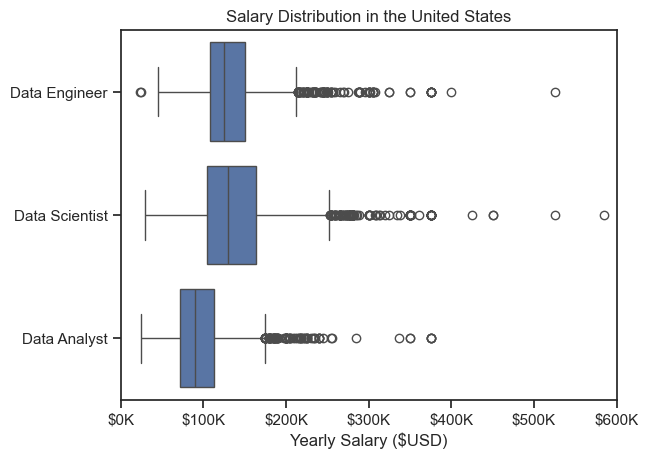

In [23]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0,600000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()